In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec

In [ ]:
# Define the alpha value for the post-plasma materials
alpha = 0.65

# Define the color for each material
cb_colors = {
    'γ-Al₂O₃': (0/255, 0/255, 0/255),
    '2% CuO@γ-Al₂O₃': (86/255, 180/255, 233/255),
    '10% CuO@γ-Al₂O₃': (0/255, 114/255, 178/255),
    '2% Fe₂O₃@γ-Al₂O₃': (230/255, 159/255, 0/255),
    '10% Fe₂O₃@γ-Al₂O₃': (213/255, 94/255, 0/255),

    'γ-Al₂O₃ pre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    '2% CuO@γ-Al₂O₃ pre-plasma': (
        (86 * alpha + 255 * (1 - alpha)) / 255,
        (180 * alpha + 255 * (1 - alpha)) / 255,
        (233 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% CuO@γ-Al₂O₃ pre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (114 * alpha + 255 * (1 - alpha)) / 255,
        (178 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% CuO@γ-Al₂O₃\npre-plasma': (
        (0 * alpha + 255 * (1 - alpha)) / 255,
        (114 * alpha + 255 * (1 - alpha)) / 255,
        (178 * alpha + 255 * (1 - alpha)) / 255
    ),
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma': (
        (230 * alpha + 255 * (1 - alpha)) / 255,
        (159 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma': (
        (213 * alpha + 255 * (1 - alpha)) / 255,
        (94 * alpha + 255 * (1 - alpha)) / 255,
        (0 * alpha + 255 * (1 - alpha)) / 255
    ),
    'γ-Al₂O₃ post-plasma': (0/255, 0/255, 0/255),
    '2% CuO@γ-Al₂O₃ post-plasma': (86/255, 180/255, 233/255),
    '10% CuO@γ-Al₂O₃ post-plasma': (0/255, 114/255, 178/255),
    '10% CuO@γ-Al₂O₃\npost-plasma': (0/255, 114/255, 178/255),
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma': (230/255, 159/255, 0/255),
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma': (213/255, 94/255, 0/255)
}

# determine order of materials for plotting
material_order = [
    'γ-Al₂O₃',
    '2% CuO@γ-Al₂O₃',
    '2% Fe₂O₃@γ-Al₂O₃',
    '10% CuO@γ-Al₂O₃',
    '10% Fe₂O₃@γ-Al₂O₃',
    'γ-Al₂O₃ pre-plasma',
    '2% CuO@γ-Al₂O₃ pre-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    '10% CuO@γ-Al₂O₃ pre-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ pre-plasma',
    'γ-Al₂O₃ post-plasma',
    '2% CuO@γ-Al₂O₃ post-plasma',
    '2% Fe₂O₃@γ-Al₂O₃ post-plasma',
    '10% CuO@γ-Al₂O₃ post-plasma',
    '10% Fe₂O₃@γ-Al₂O₃ post-plasma'
]

In [14]:
# Define the path to the Excel file
excel_file_path = (
    r'N:\FWET\FDCH\AdsCatal\General\personal_work_folders\plasmacatdesign'
    r'\materials\ugent\ugent-n2-sorption.xlsx'
)

# Read all worksheets in the Excel file into a dictionary of DataFrames
data = pd.read_excel(
    io=excel_file_path,
    sheet_name=['isotherm', 'bjh', 'mbet', 'pore_vol_total']
)

# Assign each DataFrame to a separate variable
isotherm_data = data['isotherm']
bjh_data = data['bjh']
mbet_data = data['mbet']
pore_vol_tot_data = data['pore_vol_total']

In [15]:
# Subset the isotherm data
isotherm_blank_data = isotherm_data[
    (isotherm_data['material'].isin([
        'γ-Al₂O₃',
        '2% CuO@γ-Al₂O₃',
        '10% CuO@γ-Al₂O₃',
        '2% Fe₂O₃@γ-Al₂O₃',
        '10% Fe₂O₃@γ-Al₂O₃'
    ]))
    & (isotherm_data['plasma'] == 'pre-plasma')
]

# Subset the BJH data
bjh_blank_data = bjh_data[
    (bjh_data['material'].isin([
        'γ-Al₂O₃',
        '2% CuO@γ-Al₂O₃',
        '10% CuO@γ-Al₂O₃',
        '2% Fe₂O₃@γ-Al₂O₃',
        '10% Fe₂O₃@γ-Al₂O₃'
    ]))
    & (bjh_data['plasma'] == 'pre-plasma')
    & (bjh_data['sorption'] == 'desorption')
]

In [16]:
# Define the marker for each sorption category
sorption_markers = {
    'adsorption': 's',  # square marker
    'desorption': 'o'  # circle marker
}

# Define the linestyle for each sorption category
sorption_linestyles = {
    'adsorption': '-',  # solid line
    'desorption': '--'  # dashed line
}

C:\Users\Sande\AppData\Local\Temp\ipykernel_29864\3492458940.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


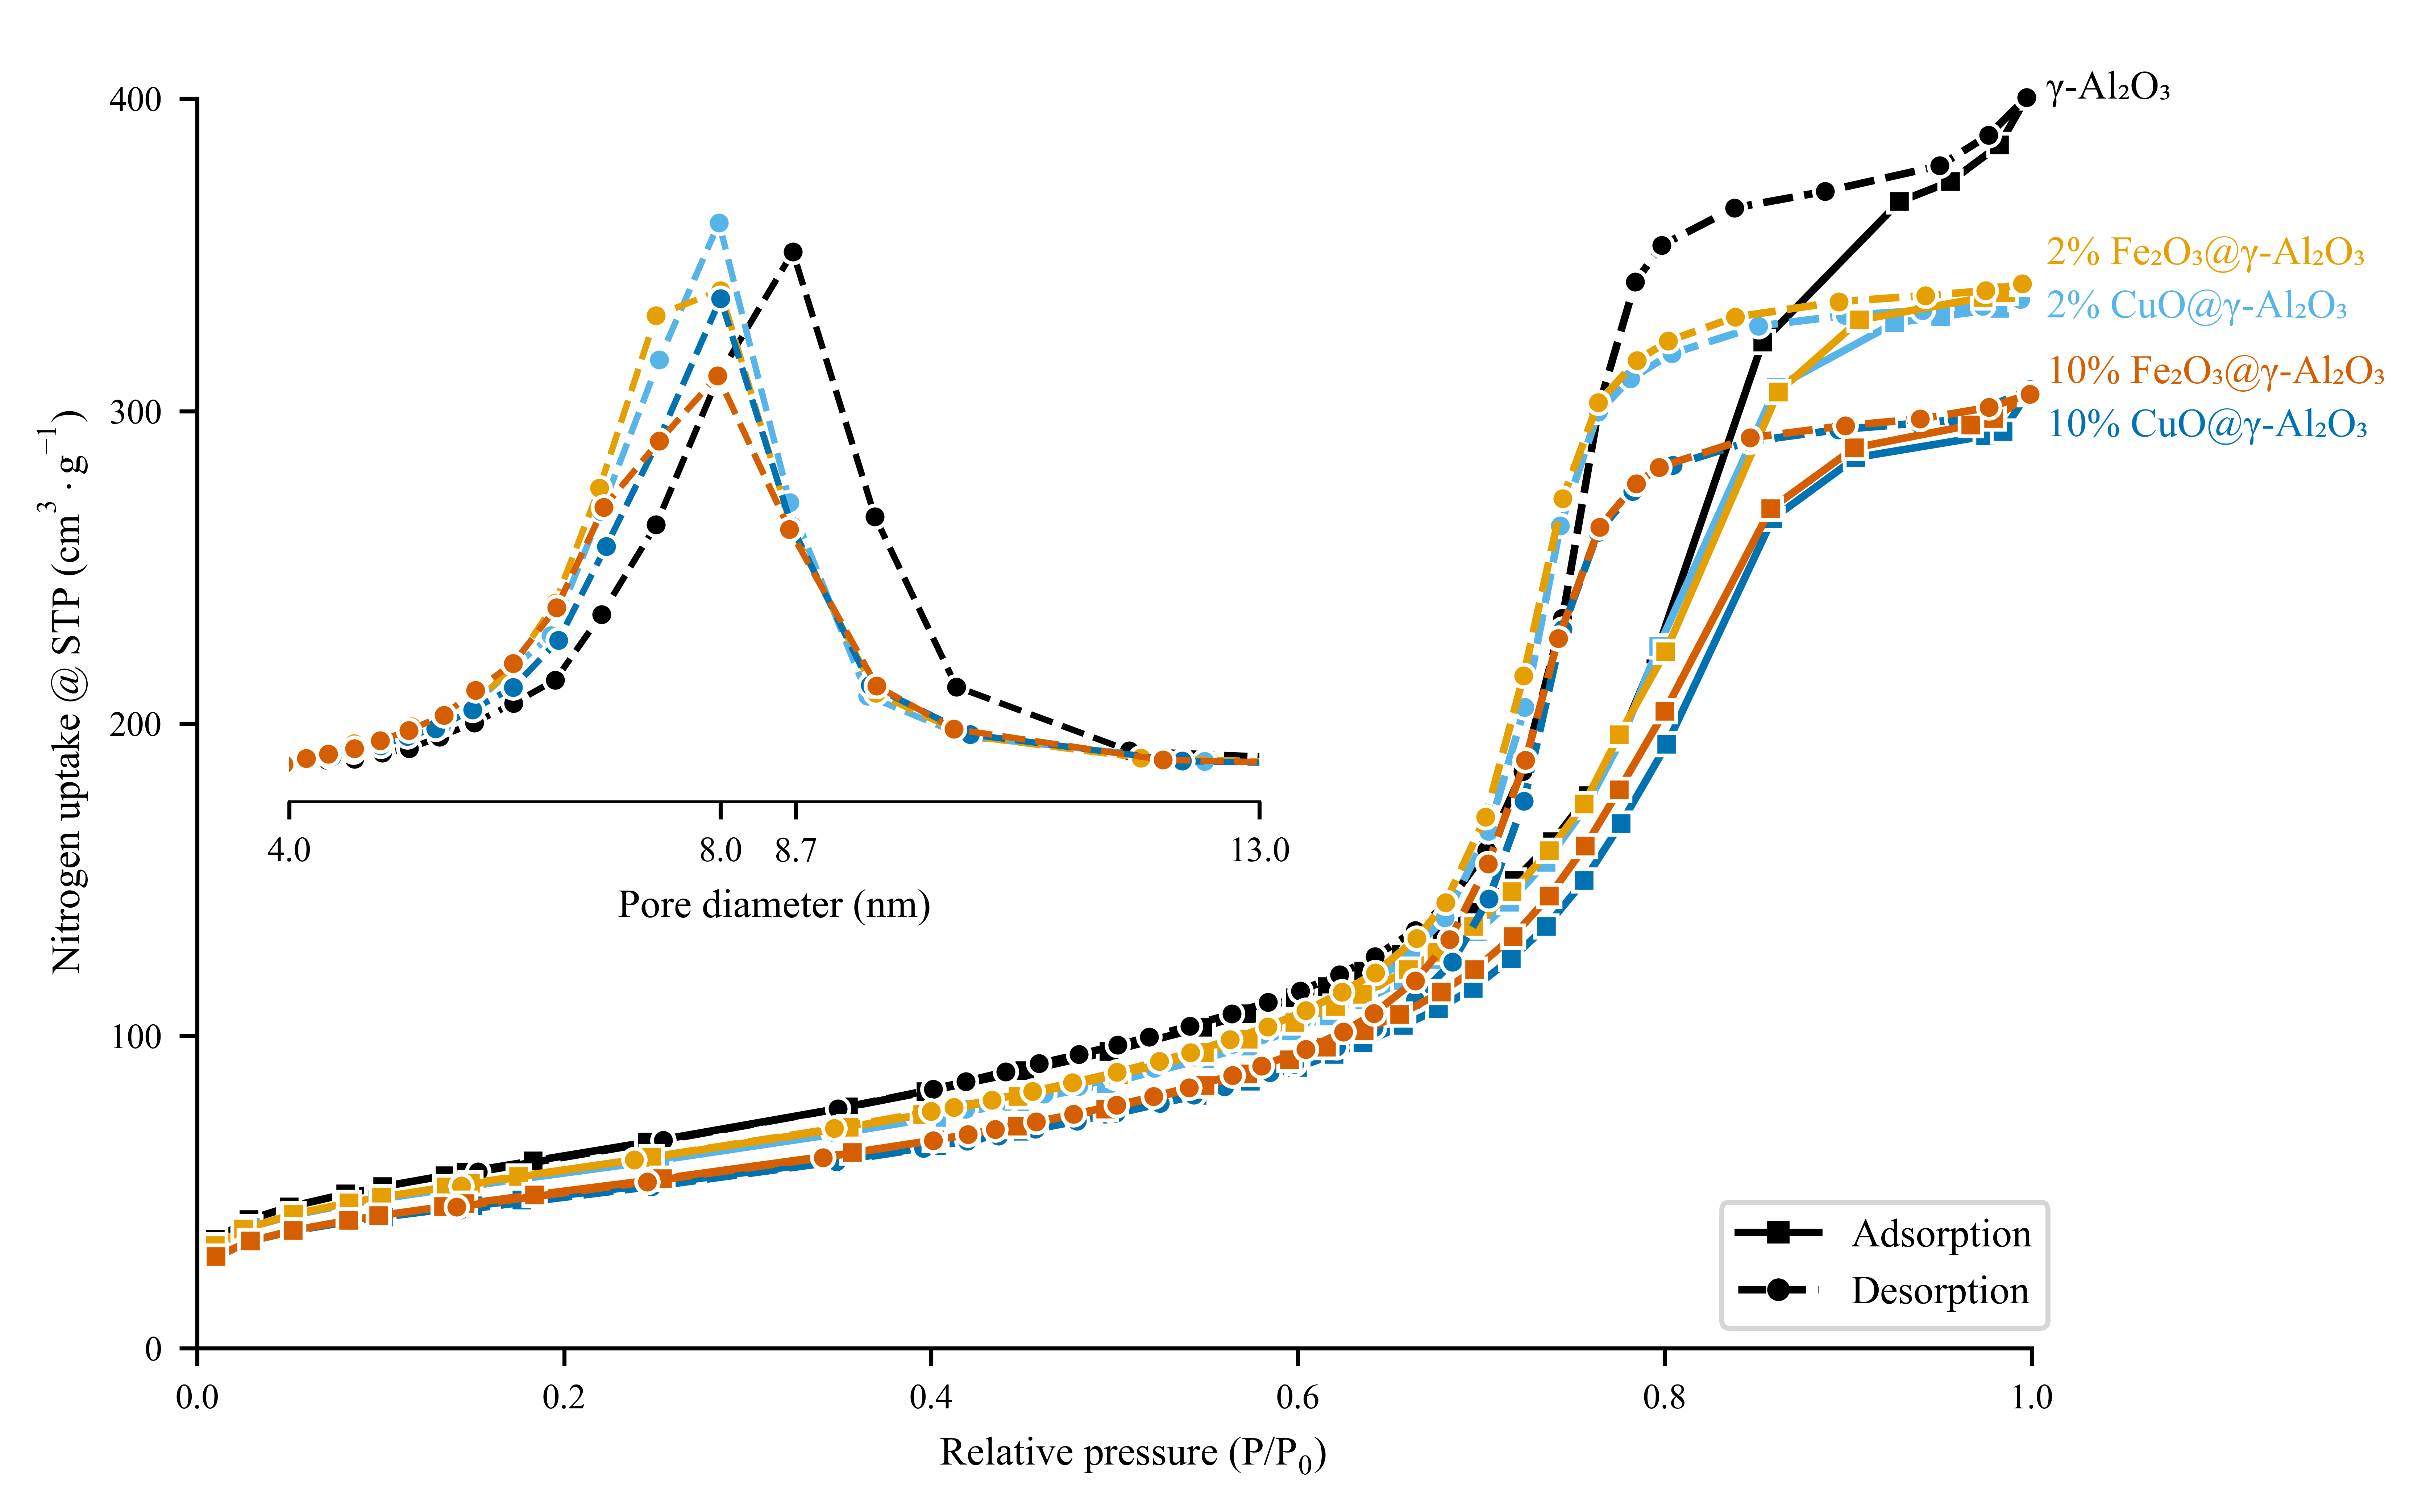

In [21]:
# Use Times New Roman font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# Set the size of the figure in inches (1 inch = 25.4 mm)
fig, ax1 = plt.subplots(
    figsize=(170/25.4, 106.25/25.4),
    dpi=1000
)

# Set font size
plt.rcParams['font.size'] = 7

# Create a line plot for the different materials
sns.lineplot(
    x='rel_pressure',
    y='vol_at_stp_cm3perg',
    hue='material',
    hue_order=material_order,
    style='sorption',
    data=isotherm_blank_data,
    palette=cb_colors,
    markers=sorption_markers,
    markersize=4.5,
    linewidth=1.5,
    legend=False,
    ax=ax1
)

# Set the x-axis labels, bounds, limits and ticks
ax1.set_xlabel(
    xlabel='Relative pressure (P/P$_0$)',
    fontsize=8
)
ax1.set_xlim([0, 1.02])
ax1.spines['bottom'].set_bounds(0, 1)

# Set the y-axis labels, bounds, limits and ticks
ax1.set_ylabel(
    ylabel='Nitrogen uptake @ STP (cm$^3\cdot$g$^{-1}$)',
    fontsize=8
)
ax1.set_ylim([0, 420])
ax1.spines['left'].set_bounds(0, 400)
ax1.set_yticks([0, 100, 200, 300, 400])

# Set tick_params for both axes
ax1.tick_params(
    axis='both',
    labelsize=7
)

# Define the label points manually
label_points = {
    'γ-Al₂O₃': (1.0, 400),
    '2% CuO@γ-Al₂O₃': (1.0, 330),
    '2% Fe₂O₃@γ-Al₂O₃': (1.0, 347),
    '10% CuO@γ-Al₂O₃': (1.0, 292),
    '10% Fe₂O₃@γ-Al₂O₃':  (1.0, 309)
}

# Loop through each item in label_points
# and add a text label with an offset
for material, (x, y) in label_points.items():
    plt.annotate(
        text=material,
        xy=(x, y),
        xytext=(3,0),
        textcoords='offset points',
        fontsize=8,
        color=cb_colors[material]
    )

# Get the unique sorption labels and capitalize them
sorption_labels = isotherm_blank_data['sorption'].str.capitalize().unique()

# Create Line2D objects for the legend
legend_elements = [
    mlines.Line2D(
        xdata=[0],
        ydata=[0],
        color='black',
        marker=sorption_markers[label.lower()],
        linestyle=sorption_linestyles[label.lower()],
        markersize=3.5,
        label=label
    ) for label in sorption_labels
]

# Add a legend manually for 'sorption'
ax1.legend(
    handles=legend_elements,
    fontsize=8,
    loc='lower right'
)

# Remove the top and right spines
sns.despine(
    ax=ax1,
    top=True,
    right=True
)

# Create a smaller plot (inset) at those coordinates
# Modify these to position your plot
left, bottom, width, height = 0.12, 0.47, 0.40, 0.40
ax2 = fig.add_axes([left, bottom, width, height])
sns.lineplot(
    x='pore_diameter_nm',
    y='dVd_cm3pernmperg',
    hue='material',
    hue_order=material_order,
    data=bjh_blank_data,
    palette=cb_colors,
    marker='o',
    linestyle='--',
    markersize=4.5,
    linewidth=1.25,
    legend=False,
    ax=ax2,
    alpha=1
)

# ax2 x-axis settings
ax2.set_xlabel(
    xlabel='Pore diameter (nm)',
    fontsize=8,
    color='black'
) 
ax2.set_xlim([4, 13])
ax2.set_xticks([4, 8, 8.7, 13])
ax2.tick_params(
    axis='x',
    colors='black',
    direction='out',
    labelsize=7
)
ax2.spines['bottom'].set_color('black')
ax2.spines['bottom'].set_linewidth(0.5)

# ax2 y-axis settings
ax2.yaxis.set_visible(False)

# despine ax2
sns.despine(ax=ax2, top=True, right=True, left=True)

plt.tight_layout()
plt.savefig(
    r'C:\Users\sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_n2_sorption_pre.pdf'
)
plt.show()

In [18]:
# Subset isotherm data for each material
# and create a new variable that combines 'material' and 'plasma'
materials_isotherm = {
    'isotherm_c450_data': 'γ-Al₂O₃',
    'isotherm_copper_02perc_data': '2% CuO@γ-Al₂O₃',
    'isotherm_copper_10perc_data': '10% CuO@γ-Al₂O₃',
    'isotherm_iron_02perc_data': '2% Fe₂O₃@γ-Al₂O₃',
    'isotherm_iron_10perc_data': '10% Fe₂O₃@γ-Al₂O₃'
}

for variable_name, material in materials_isotherm.items():
    df_temp = isotherm_data[isotherm_data['material'] == material].copy()
    df_temp['material_plasma'] = df_temp['material'] + ' ' + df_temp['plasma']
    globals()[variable_name] = df_temp

# Subset bjh data for each material
# and create a new variable that combines 'material' and 'plasma'
materials_bjh = {
    'bjh_c450_data': 'γ-Al₂O₃',
    'bjh_copper_02perc_data': '2% CuO@γ-Al₂O₃',
    'bjh_copper_10perc_data': '10% CuO@γ-Al₂O₃',
    'bjh_iron_02perc_data': '2% Fe₂O₃@γ-Al₂O₃',
    'bjh_iron_10perc_data': '10% Fe₂O₃@γ-Al₂O₃'
}

for variable_name, material in materials_bjh.items():
    df_temp = bjh_data[(bjh_data['material'] == material)
                       & (bjh_data['sorption'] == 'desorption')].copy()
    df_temp['material_plasma'] = df_temp['material'] + ' ' + df_temp['plasma']
    globals()[variable_name] = df_temp

C:\Users\Sande\AppData\Local\Temp\ipykernel_29864\329250139.py:487: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


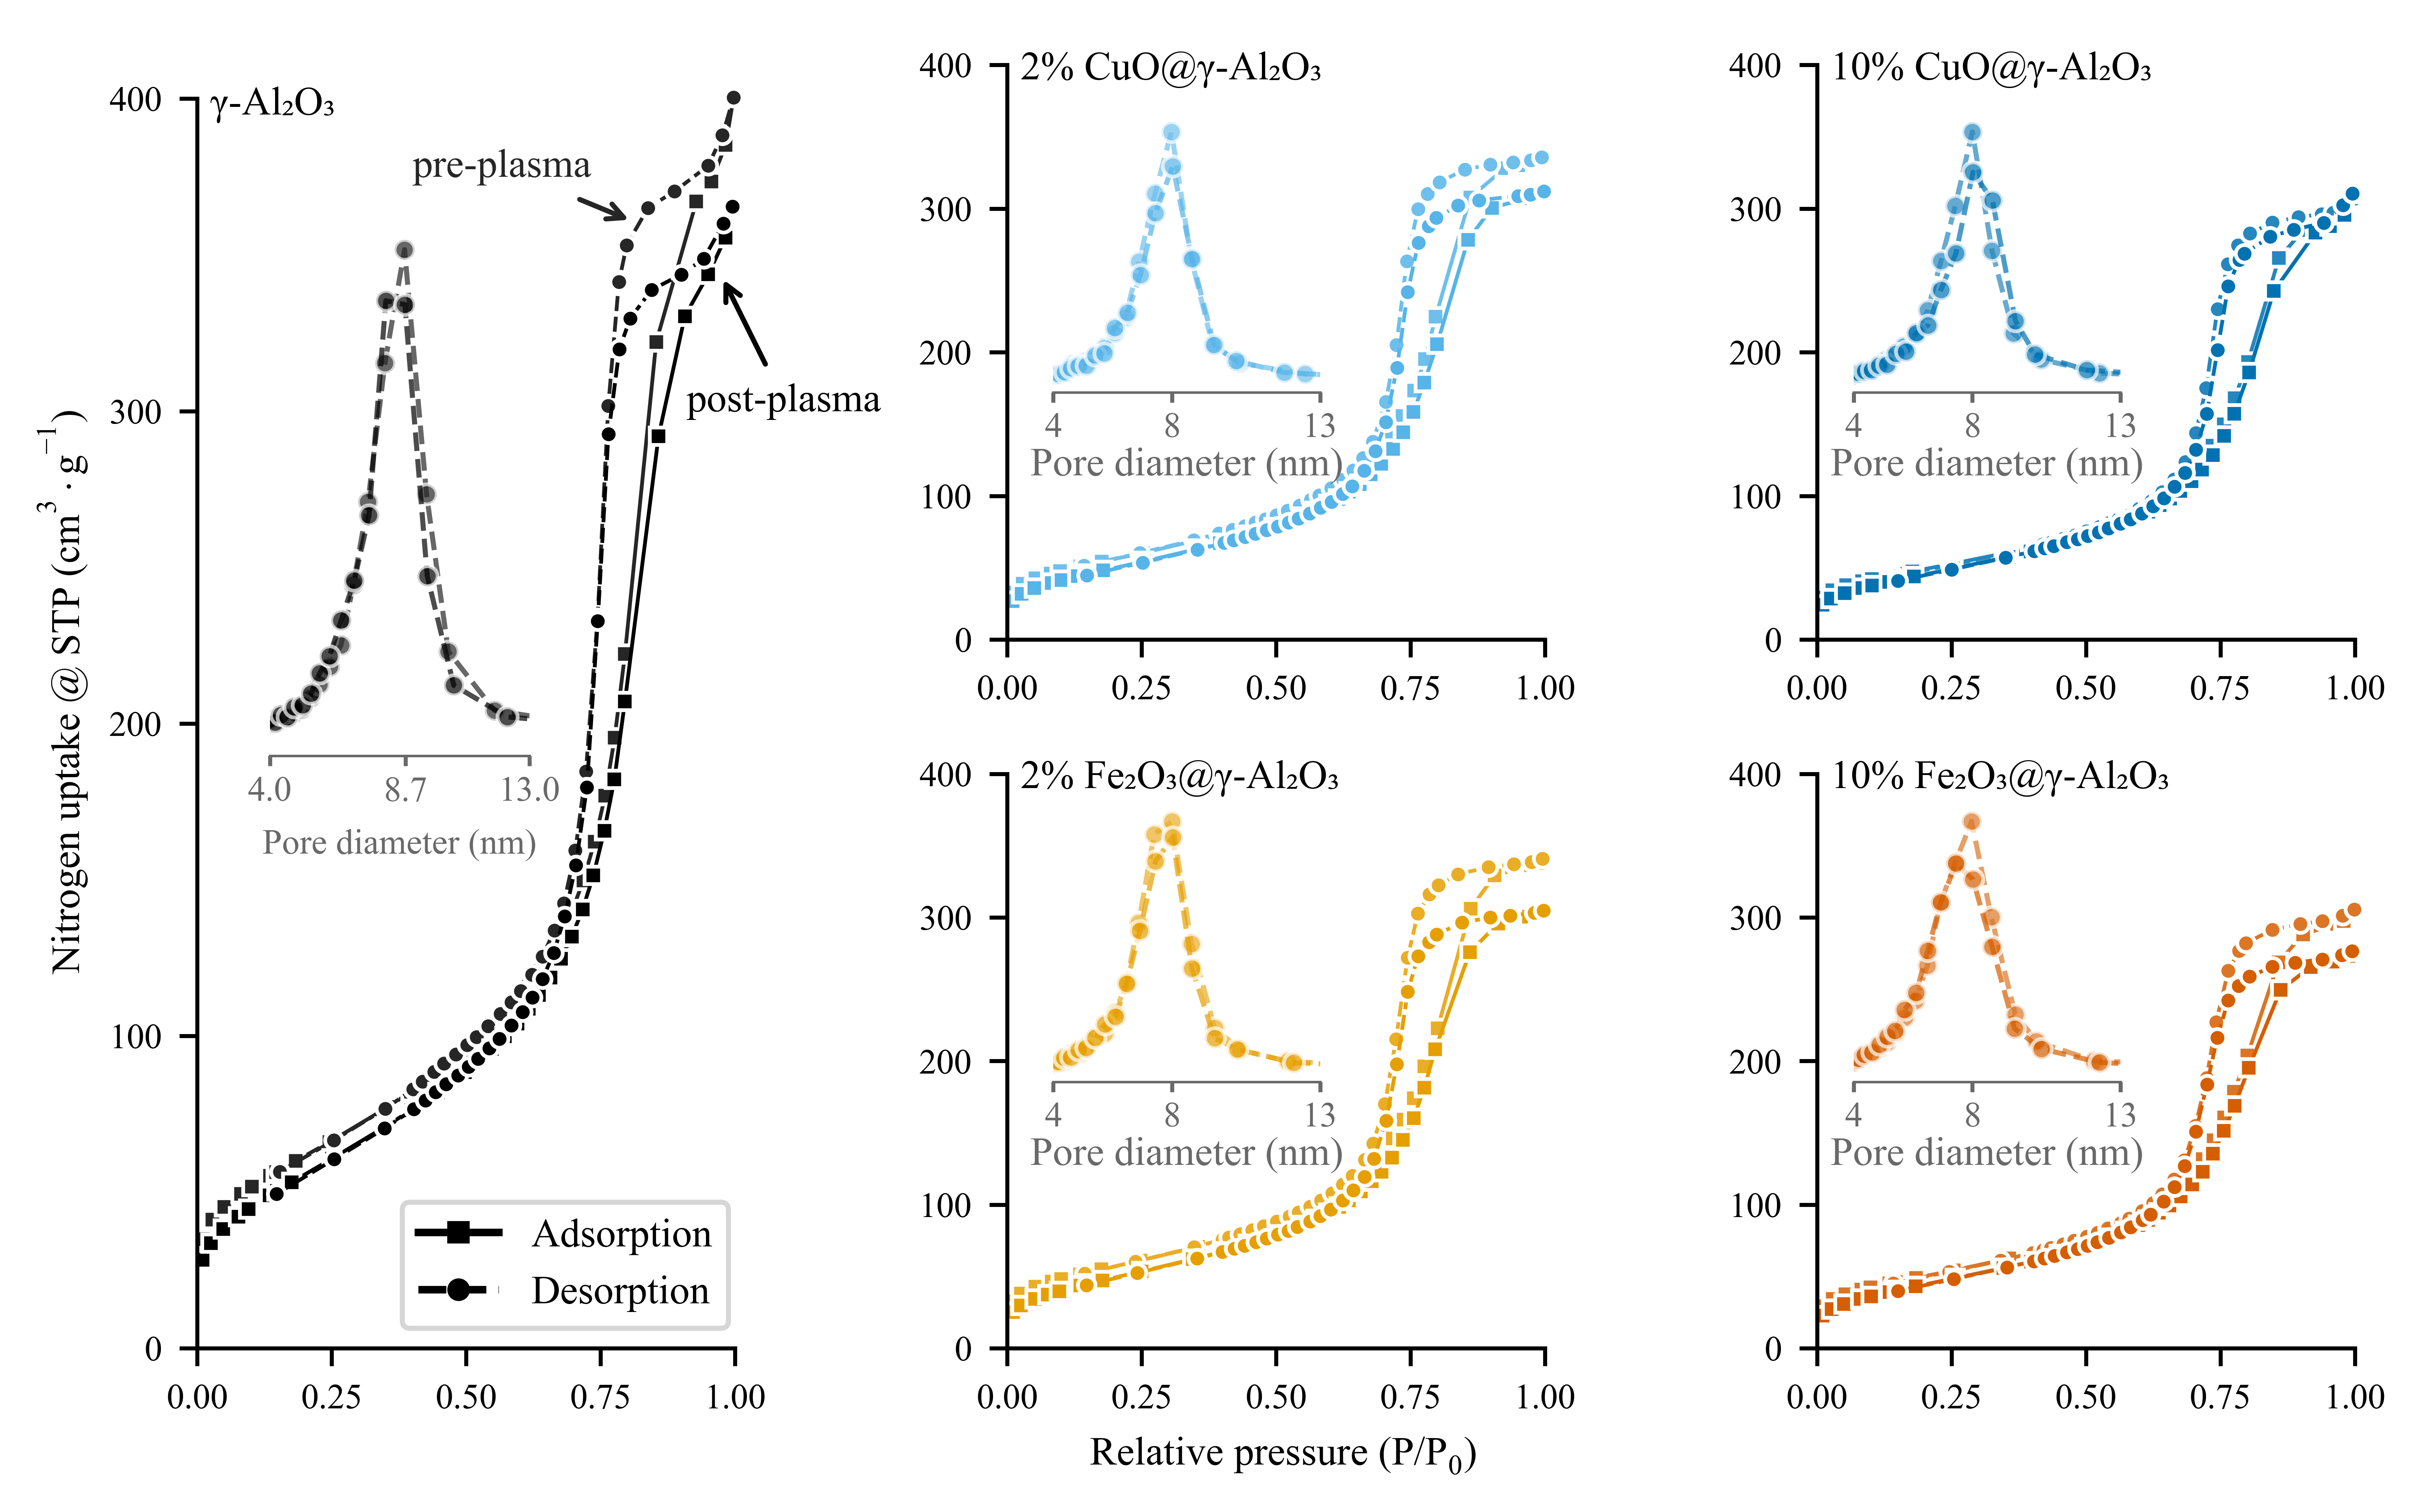

In [19]:
# Use Times New Roman font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# Set font size
plt.rcParams['font.size'] = 7

# Set the size of the figure in inches (1 inch = 25.4 mm)
fig = plt.figure(
    figsize=(170/25.4, 106.25/25.4),
    dpi=1000
)

# Create a grid of 2 rows and 3 columns
gs = gridspec.GridSpec(
    nrows=2,
    ncols=3,
    figure=fig
)

# Create a subplot that spans two rows
ax1 = fig.add_subplot(gs[:, 0])

# Create the remaining four subplots
ax2 = fig.add_subplot(gs[0, 1], sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(gs[0, 2], sharey=ax1, sharex=ax1)
ax4 = fig.add_subplot(gs[1, 1], sharex=ax2, sharey=ax1)
ax5 = fig.add_subplot(gs[1, 2], sharex=ax3, sharey=ax1)

# Settings for the whole image
plt.xlim(0, 1.025)
plt.ylim(0, 420)

# First plot
sns.lineplot(
    x='rel_pressure',
    y='vol_at_stp_cm3perg',
    hue='material_plasma',
    hue_order=material_order,
    style='sorption',
    data=isotherm_c450_data,
    palette=cb_colors,
    markers=sorption_markers,
    markersize=3.5,
    linewidth=0.75,
    ax=ax1,
    legend=False
)

# Second plot
sns.lineplot(
    x='rel_pressure',
    y='vol_at_stp_cm3perg',
    hue='material_plasma',
    hue_order=material_order,
    style='sorption',
    data=isotherm_copper_02perc_data,
    palette=cb_colors,
    markers=sorption_markers,
    markersize=3.5,
    linewidth=0.75,
    ax=ax2,
    legend=False
)

# Third plot
sns.lineplot(
    x='rel_pressure',
    y='vol_at_stp_cm3perg',
    hue='material_plasma',
    hue_order=material_order,
    style='sorption',
    data=isotherm_copper_10perc_data,
    palette=cb_colors,
    markers=sorption_markers,
    markersize=3.5,
    linewidth=0.75,
    ax=ax3,
    legend=False
)

# Fourth plot
sns.lineplot(
    x='rel_pressure',
    y='vol_at_stp_cm3perg',
    hue='material_plasma',
    hue_order=material_order,
    style='sorption',
    data=isotherm_iron_02perc_data,
    palette=cb_colors,
    markers=sorption_markers,
    markersize=3.5,
    linewidth=0.75,
    ax=ax4,
    legend=False
)

# Fifth plot
sns.lineplot(
    x='rel_pressure',
    y='vol_at_stp_cm3perg',
    hue='material_plasma',
    hue_order=material_order,
    style='sorption',
    data=isotherm_iron_10perc_data,
    palette=cb_colors,
    markers=sorption_markers,
    markersize=3.5,
    linewidth=0.75,
    ax=ax5,
    legend=False
)

# Get the unique sorption labels and capitalize them
sorption_labels = isotherm_blank_data['sorption'].str.capitalize().unique()

# Create Line2D objects for the legend
legend_elements = [
    mlines.Line2D(
        xdata=[0],
        ydata=[0],
        color='black',
        marker=sorption_markers[label.lower()],
        linestyle=sorption_linestyles[label.lower()],
        markersize=3.5,
        label=label
    ) for label in sorption_labels
]

# Add a legend manually for 'sorption' only to the first plot
ax1.legend(
    handles=legend_elements,
    fontsize=8,
    loc='lower right'
)

# Remove the x axis labels for the first and third plot
# and set the x axis label for the second plot
ax1.xaxis.label.set_visible(False)
ax2.xaxis.label.set_visible(False)
ax3.xaxis.label.set_visible(False)
ax4.set_xlabel(xlabel='Relative pressure (P/P$_0$)', fontsize=8)
ax5.xaxis.label.set_visible(False)

# Set the x-axis bounds
ax1.spines['bottom'].set_bounds(0, 1)
ax2.spines['bottom'].set_bounds(0, 1)
ax3.spines['bottom'].set_bounds(0, 1)
ax4.spines['bottom'].set_bounds(0, 1)
ax5.spines['bottom'].set_bounds(0, 1)

# Decrease the tick label size for the x- and y-axis
ax1.tick_params(axis='both', labelsize=7)
ax2.tick_params(axis='both', labelsize=7)
ax3.tick_params(axis='both', labelsize=7)
ax4.tick_params(axis='both', labelsize=7)
ax5.tick_params(axis='both', labelsize=7)

# Remove the y axis labels for the second and third plot
# and set the y axis label for the first plot
ax1.set_ylabel(
    ylabel='Nitrogen uptake @ STP (cm$^3\cdot$g$^{-1}$)',
    fontsize=8
)
ax2.yaxis.label.set_visible(False)
ax3.yaxis.label.set_visible(False)
ax4.yaxis.label.set_visible(False)
ax5.yaxis.label.set_visible(False)

# Set y-axis ticks
ax1.set_yticks([0, 100, 200, 300, 400])
ax2.set_yticks([0, 100, 200, 300, 400])
ax3.set_yticks([0, 100, 200, 300, 400])
ax4.set_yticks([0, 100, 200, 300, 400])
ax5.set_yticks([0, 100, 200, 300, 400])

# Set the y-axis bounds
ax1.spines['left'].set_bounds(0, 400)
ax2.spines['left'].set_bounds(0, 400)
ax3.spines['left'].set_bounds(0, 400)
ax4.spines['left'].set_bounds(0, 400)
ax5.spines['left'].set_bounds(0, 400)

# Add the material to the top left corner of each plot
ax1.text(
    x=0.025,
    y=395,
    s='γ-Al₂O₃',
    fontsize=8,
    transform=ax1.transData
)
ax2.text(
    x=0.025,
    y=390,
    s='2% CuO@γ-Al₂O₃',
    fontsize=8,
    transform=ax2.transData
)
ax3.text(
    x=0.025,
    y=390,
    s='10% CuO@γ-Al₂O₃',
    fontsize=8,
    transform=ax3.transData
)
ax4.text(
    x=0.025,
    y=390,
    s='2% Fe₂O₃@γ-Al₂O₃',
    fontsize=8,
    transform=ax4.transData
)
ax5.text(
    x=0.025,
    y=390,
    s='10% Fe₂O₃@γ-Al₂O₃',
    fontsize=8,
    transform=ax5.transData
)

# Add annotation that specifies pre- and post-plasma
ax1.annotate(text='pre-plasma',
             xy=(0.82, 360),
             xytext=(0.4, 375),
             textcoords='data',
             fontsize=8,
             color=((0*alpha + 255*(1-alpha))/255,
                    (0*alpha+255*(1-alpha))/255,
                    (0*alpha+255*(1-alpha))/255),
             arrowprops=dict(arrowstyle='->',
                             color=((0*alpha+255*(1-alpha))/255,
                                    (0*alpha+255*(1-alpha))/255,
                                    (0*alpha+255*(1-alpha))/255)
                            )
)
ax1.annotate(
    text='post-plasma',
    xy=(0.97, 345),
    xytext=(0.91, 300),
    textcoords='data',
    fontsize=8,
    color='black',
    arrowprops=dict(arrowstyle='->', color='black')
)

# Remove the top and right spines
sns.despine(ax=ax1, top=True, right=True)
sns.despine(ax=ax2, top=True, right=True)
sns.despine(ax=ax3, top=True, right=True)
sns.despine(ax=ax4, top=True, right=True)
sns.despine(ax=ax5, top=True, right=True)

# Create a smaller plot (inset) ax6 for the pore distribution of C450
# before and after plasma
# Modify these to position your plot
left, bottom, width, height = 0.112, 0.50, 0.107, 0.35
ax6 = fig.add_axes([left, bottom, width, height])
sns.lineplot(
    x='pore_diameter_nm',
    y='dVd_cm3pernmperg',
    hue='material_plasma',
    hue_order=material_order,
    data=bjh_c450_data,
    palette=cb_colors,
    marker='o',
    linestyle='--',
    markersize=4,
    linewidth=1,
    legend=False,
    ax=ax6,
    alpha=0.7
)

# ax6 x-axis settings
ax6.set_xlabel(xlabel='Pore diameter (nm)', fontsize=7, color='dimgrey')
ax6.set_xlim([4, 13]) 
ax6.set_xticks([4, 8.7, 13])
ax6.tick_params(
    axis='x',
    colors='dimgrey',
    direction='out',
    labelsize=7,
    length=2,
    pad=2
)
ax6.spines['bottom'].set_color('dimgrey')
ax6.spines['bottom'].set_linewidth(0.5)

# ax6 y-axis settings
ax6.yaxis.set_visible(False)

# despine ax6
sns.despine(ax=ax6, top=True, right=True, left=True)

# Create a smaller plot (inset) ax7 for the pore distribution
# of cupper 2% before and after plasma
left, bottom, width, height = 0.435, 0.74, 0.11, 0.18
ax7 = fig.add_axes([left, bottom, width, height])
sns.lineplot(
    x='pore_diameter_nm',
    y='dVd_cm3pernmperg',
    hue='material_plasma',
    hue_order=material_order,
    data=bjh_copper_02perc_data,
    palette=cb_colors,
    marker='o',
    linestyle='--',
    markersize=4,
    linewidth=1,
    legend=False,
    ax=ax7,
    alpha=0.7
)

# ax7 x-axis settings
ax7.set_xlabel(
    xlabel='Pore diameter (nm)',
    fontsize=8,
    color='dimgrey',
    labelpad=0.5
)
ax7.set_xlim([4, 13])
ax7.set_xticks([4, 8, 13])
ax7.tick_params(
    axis='x',
    colors='dimgrey',
    direction='out',
    labelsize=7,
    length=2,
    pad=2
)
ax7.spines['bottom'].set_color('dimgrey')
ax7.spines['bottom'].set_linewidth(0.5)

# ax7 y-axis settings
ax7.yaxis.set_visible(False)

# despine ax7
sns.despine(ax=ax7, top=True, right=True, left=True)


# Create a smaller plot (inset) ax8 for the pore distribution
# of cupper 10% before and after plasma
left, bottom, width, height = 0.765, 0.74, 0.11, 0.18
ax8 = fig.add_axes([left, bottom, width, height])
sns.lineplot(
    x='pore_diameter_nm',
    y='dVd_cm3pernmperg',
    hue='material_plasma',
    hue_order=material_order,
    data=bjh_copper_10perc_data,
    palette=cb_colors,
    marker='o',
    linestyle='--',
    markersize=4,
    linewidth=1,
    legend=False,
    ax=ax8,
    alpha=0.7
)

# ax8 x-axis settings
ax8.set_xlabel(
    xlabel='Pore diameter (nm)',
    fontsize=8,
    color='dimgrey',
    labelpad=0.5
)
ax8.set_xlim([4, 13])
ax8.set_xticks([4, 8, 13])
ax8.tick_params(
    axis='x',
    colors='dimgrey',
    direction='out',
    labelsize=7,
    length=2,
    pad=2
)
ax8.spines['bottom'].set_color('dimgrey')
ax8.spines['bottom'].set_linewidth(0.5)

# ax8 y-axis settings
ax8.yaxis.set_visible(False) # remove the y-axis label

# despine ax8
sns.despine(ax=ax8, top=True, right=True, left=True)


# Create a smaller plot (inset) ax9 for the pore distribution
# of cupper 10% before and after plasma
left, bottom, width, height = 0.435, 0.285, 0.11, 0.18
ax9 = fig.add_axes([left, bottom, width, height])
sns.lineplot(
    x='pore_diameter_nm',
    y='dVd_cm3pernmperg',
    hue='material_plasma',
    hue_order=material_order,
    data=bjh_iron_02perc_data,
    palette=cb_colors,
    marker='o',
    linestyle='--',
    markersize=4,
    linewidth=1,
    legend=False,
    ax=ax9,
    alpha=0.7
)

# ax9 x-axis settings
ax9.set_xlabel(
    xlabel='Pore diameter (nm)',
    fontsize=8,
    color='dimgrey',
    labelpad=0.5
)
ax9.set_xlim([4, 13])
ax9.set_xticks([4, 8, 13])
ax9.tick_params(
    axis='x',
    colors='dimgrey',
    direction='out',
    labelsize=7,
    length=2,
    pad=2
)
ax9.spines['bottom'].set_color('dimgrey')
ax9.spines['bottom'].set_linewidth(0.5)

# ax9 y-axis settings
ax9.yaxis.set_visible(False)

# despine ax9
sns.despine(ax=ax9, top=True, right=True, left=True)


# Create a smaller plot (inset) ax10 for the pore distribution
# of iron 10% before and after plasma
left, bottom, width, height = 0.765, 0.285, 0.11, 0.18
ax10 = fig.add_axes([left, bottom, width, height])
sns.lineplot(
    x='pore_diameter_nm',
    y='dVd_cm3pernmperg',
    hue='material_plasma',
    hue_order=material_order,
    data=bjh_iron_10perc_data,
    palette=cb_colors,
    marker='o',
    linestyle='--',
    markersize=4,
    linewidth=1,
    legend=False,
    ax=ax10,
    alpha=0.7
)

# ax10 x-axis settings
ax10.set_xlabel(
    xlabel='Pore diameter (nm)',
    fontsize=8,
    color='dimgrey',
    labelpad=0.5
)
ax10.set_xlim([4, 13])
ax10.set_xticks([4, 8, 13])
ax10.tick_params(
    axis='x',
    colors='dimgrey',
    direction='out',
    labelsize=7,
    length=2,
    pad=2
)
ax10.spines['bottom'].set_color('dimgrey')
ax10.spines['bottom'].set_linewidth(0.5)

# ax10 y-axis settings
ax10.yaxis.set_visible(False)

# despine ax10
sns.despine(ax=ax10, top=True, right=True, left=True)


plt.tight_layout()
plt.savefig(
    r'C:\Users\sande\Dropbox\Apps\Overleaf\ladca_incat_envecon_paper_elsevier\figs\sander_n2_sorption_post.pdf'
)
plt.show()